In [38]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [39]:
df=pd.read_csv('weatherHistory.csv')
df


,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.


# Extracting features from formatted date

In [40]:
df['Formatted Date'] = pd.to_datetime(df['Formatted Date'], utc=True)
df['month'] = df['Formatted Date'].dt.month
df['year'] = df['Formatted Date'].dt.year
df['day'] = df['Formatted Date'].dt.day
df['hour'] = df['Formatted Date'].dt.hour


df

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,month,year,day,hour
0,2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,3,2006,31,22
1,2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.,3,2006,31,23
2,2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.,4,2006,1,0
3,2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.,4,2006,1,1
4,2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.,4,2006,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 17:00:00+00:00,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.,9,2016,9,17
96449,2016-09-09 18:00:00+00:00,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.,9,2016,9,18
96450,2016-09-09 19:00:00+00:00,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.,9,2016,9,19
96451,2016-09-09 20:00:00+00:00,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.,9,2016,9,20


In [41]:
df=df.drop('Formatted Date', axis=1)

# Deleting rows with missing values

In [42]:
df = df.dropna()
df

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,month,year,day,hour
0,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,3,2006,31,22
1,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.,3,2006,31,23
2,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.,4,2006,1,0
3,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.,4,2006,1,1
4,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.,4,2006,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96448,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.,9,2016,9,17
96449,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.,9,2016,9,18
96450,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.,9,2016,9,19
96451,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.,9,2016,9,20


# Deleting duplicate values

In [43]:
df = df.drop_duplicates()

In [44]:
df

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,month,year,day,hour
0,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,3,2006,31,22
1,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.,3,2006,31,23
2,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.,4,2006,1,0
3,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.,4,2006,1,1
4,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.,4,2006,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96448,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.,9,2016,9,17
96449,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.,9,2016,9,18
96450,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.,9,2016,9,19
96451,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.,9,2016,9,20


In [45]:
unique_values_counts = df['Summary'].value_counts()
unique_values_counts

Summary
Partly Cloudy                          31628
Mostly Cloudy                          27914
Overcast                               16516
Clear                                  10746
Foggy                                   7117
Breezy and Overcast                      528
Breezy and Mostly Cloudy                 516
Breezy and Partly Cloudy                 386
Dry and Partly Cloudy                     86
Windy and Partly Cloudy                   67
Light Rain                                63
Breezy                                    54
Windy and Overcast                        45
Humid and Mostly Cloudy                   40
Drizzle                                   39
Breezy and Foggy                          35
Windy and Mostly Cloudy                   35
Dry                                       34
Humid and Partly Cloudy                   17
Dry and Mostly Cloudy                     14
Rain                                      10
Windy                                      8
Hu

# Decreasing output classes

In [46]:
values_to_delete= ['Mostly Cloudy','Partly Cloudy','Breezy and Dry','Dangerously Windy and Partly Cloudy', 'Windy and Dry', 'Windy and Dry', 'Windy and Foggy', 'Humid and Overcast', 'Windy', 'Rain', 'Dry and Mostly Cloudy', 'Humid and Partly Cloudy', 'Dry', 'Windy and Mostly Cloudy', 'Breezy and Foggy', 'Drizzle', 'Humid and Mostly Cloudy', 'Windy and Overcast', 'Breezy', 'Light Rain', 'Windy and Partly Cloudy', 'Dry and Partly Cloudy', 'Breezy and Partly Cloudy', 'Breezy and Mostly Cloudy', 'Breezy and Overcast']
df = df[~df['Summary'].isin(values_to_delete)]

In [47]:
unique_values_counts = df['Summary'].value_counts()
unique_values_counts

Summary
Overcast    16516
Clear       10746
Foggy        7117
Name: count, dtype: int64

# Encoding categorical variables

In [48]:
df.loc[df['Precip Type'] == 'rain', 'Precip Type'] = 1
df.loc[df['Precip Type'] == 'snow', 'Precip Type'] = 0

In [49]:
df

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,month,year,day,hour
46,Overcast,1,14.422222,14.422222,0.58,20.0123,159.0,15.8263,0.0,1007.85,Mostly cloudy throughout the day.,4,2006,10,20
47,Overcast,1,14.255556,14.255556,0.59,16.5025,168.0,14.9569,0.0,1007.89,Mostly cloudy throughout the day.,4,2006,10,21
48,Overcast,1,13.772222,13.772222,0.60,17.0982,160.0,15.8263,0.0,1007.36,Foggy in the evening.,4,2006,10,22
49,Overcast,1,13.283333,13.283333,0.63,14.3612,160.0,15.8263,0.0,1007.26,Foggy in the evening.,4,2006,10,23
50,Overcast,1,8.633333,5.466667,0.87,22.0409,32.0,6.6976,0.0,1005.10,Foggy in the evening.,4,2006,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96432,Clear,1,15.594444,15.594444,0.87,3.2844,41.0,15.4399,0.0,1014.52,Partly cloudy starting in the morning.,9,2016,9,1
96433,Clear,1,15.011111,15.011111,0.93,3.2039,341.0,15.8263,0.0,1014.37,Partly cloudy starting in the morning.,9,2016,9,2
96434,Clear,1,15.016667,15.016667,0.90,2.7048,359.0,14.9569,0.0,1014.55,Partly cloudy starting in the morning.,9,2016,9,3
96435,Clear,1,13.872222,13.872222,0.93,4.7495,0.0,15.8263,0.0,1014.66,Partly cloudy starting in the morning.,9,2016,9,4


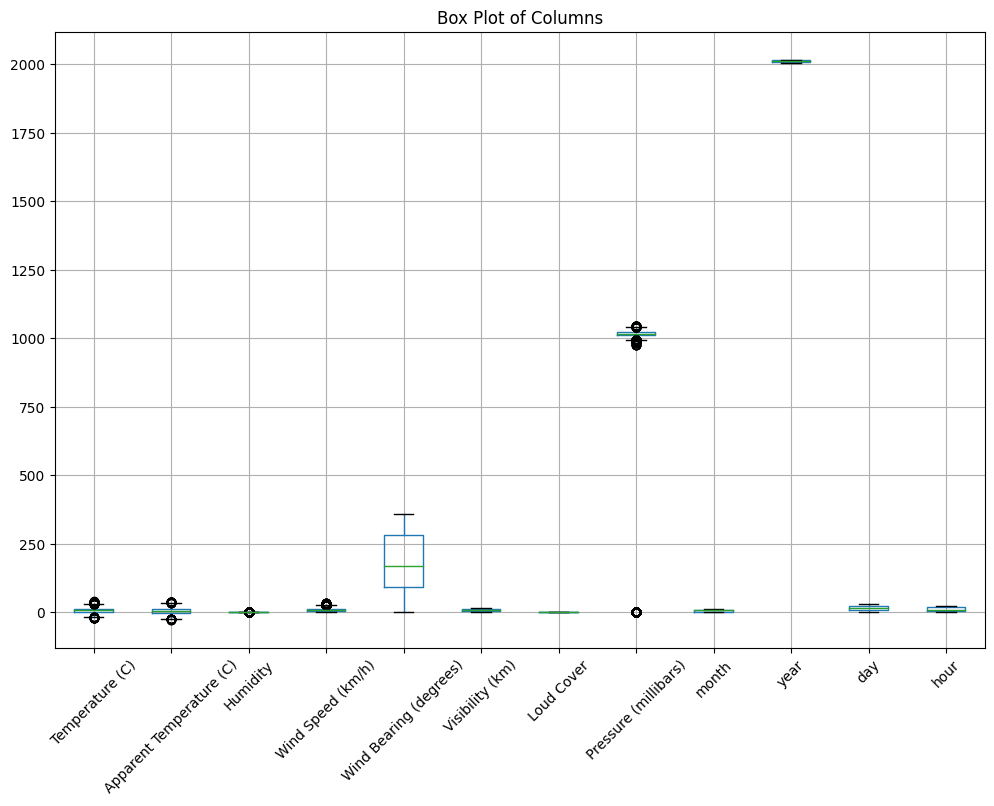

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a pandas DataFrame named 'df' with multiple columns

# Create a box plot for all columns
plt.figure(figsize=(12, 8))
df.boxplot()
plt.title('Box Plot of Columns')
plt.xticks(rotation=45)
plt.show()


In [51]:
import pandas as pd
import numpy as np

# Assuming you have a pandas DataFrame named 'df' with numeric columns

# Select only the numeric columns
numeric_columns = df.select_dtypes(include=[np.number])

# Define the multiplier for outlier detection
k = 1.5

# Calculate the lower and upper bounds for outliers
Q1 = numeric_columns.quantile(0.25)
Q3 = numeric_columns.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - k * IQR
upper_bound = Q3 + k * IQR

# Identify the rows that contain outliers
outlier_rows = ((numeric_columns < lower_bound) | (numeric_columns > upper_bound)).any(axis=1)

# Remove the rows with outliers from the DataFrame
df = df[~outlier_rows]

# Print the DataFrame with outliers removed
print(df)

df.loc[~outlier_rows, numeric_columns.columns] = df[numeric_columns.columns]

df


        Summary Precip Type  Temperature (C)  Apparent Temperature (C)   
46     Overcast           1        14.422222                 14.422222  \
47     Overcast           1        14.255556                 14.255556   
48     Overcast           1        13.772222                 13.772222   
49     Overcast           1        13.283333                 13.283333   
50     Overcast           1         8.633333                  5.466667   
...         ...         ...              ...                       ...   
96432     Clear           1        15.594444                 15.594444   
96433     Clear           1        15.011111                 15.011111   
96434     Clear           1        15.016667                 15.016667   
96435     Clear           1        13.872222                 13.872222   
96436     Clear           1        16.072222                 16.072222   

       Humidity  Wind Speed (km/h)  Wind Bearing (degrees)  Visibility (km)   
46         0.58            20.01

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,month,year,day,hour
46,Overcast,1,14.422222,14.422222,0.58,20.0123,159.0,15.8263,0.0,1007.85,Mostly cloudy throughout the day.,4,2006,10,20
47,Overcast,1,14.255556,14.255556,0.59,16.5025,168.0,14.9569,0.0,1007.89,Mostly cloudy throughout the day.,4,2006,10,21
48,Overcast,1,13.772222,13.772222,0.60,17.0982,160.0,15.8263,0.0,1007.36,Foggy in the evening.,4,2006,10,22
49,Overcast,1,13.283333,13.283333,0.63,14.3612,160.0,15.8263,0.0,1007.26,Foggy in the evening.,4,2006,10,23
50,Overcast,1,8.633333,5.466667,0.87,22.0409,32.0,6.6976,0.0,1005.10,Foggy in the evening.,4,2006,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96432,Clear,1,15.594444,15.594444,0.87,3.2844,41.0,15.4399,0.0,1014.52,Partly cloudy starting in the morning.,9,2016,9,1
96433,Clear,1,15.011111,15.011111,0.93,3.2039,341.0,15.8263,0.0,1014.37,Partly cloudy starting in the morning.,9,2016,9,2
96434,Clear,1,15.016667,15.016667,0.90,2.7048,359.0,14.9569,0.0,1014.55,Partly cloudy starting in the morning.,9,2016,9,3
96435,Clear,1,13.872222,13.872222,0.93,4.7495,0.0,15.8263,0.0,1014.66,Partly cloudy starting in the morning.,9,2016,9,4


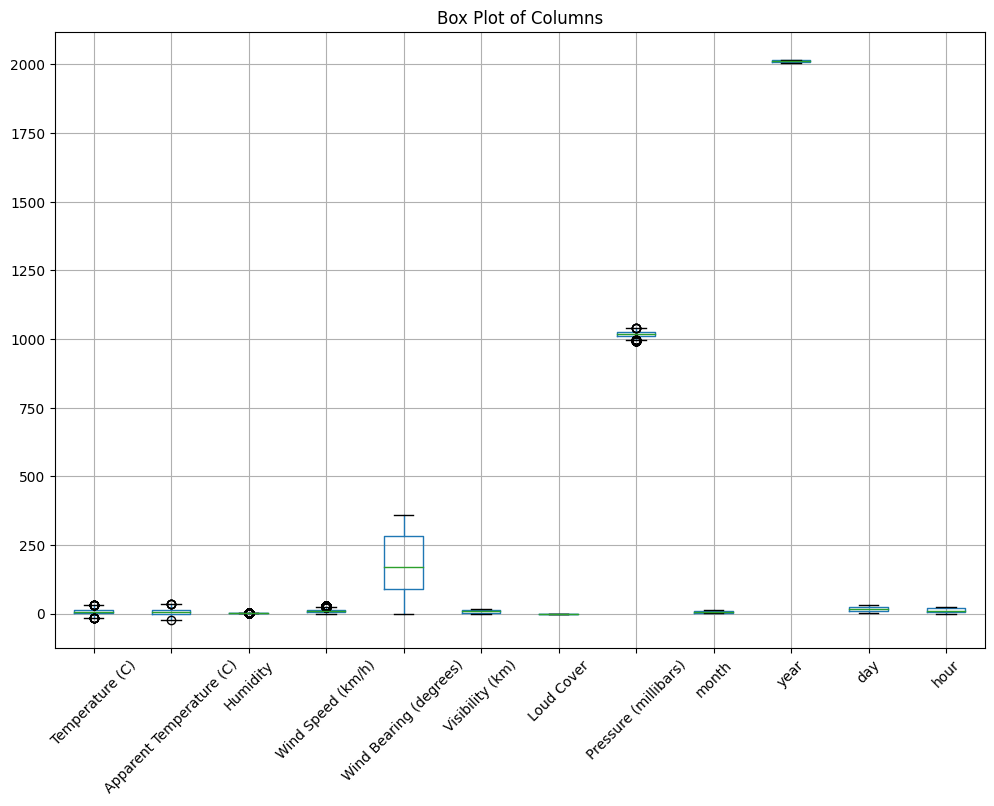

In [52]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a pandas DataFrame named 'df' with multiple columns

# Create a box plot for all columns
plt.figure(figsize=(12, 8))
df.boxplot()
plt.title('Box Plot of Columns')
plt.xticks(rotation=45)
plt.show()



# Feature Scaling 

In [53]:
from sklearn.preprocessing import StandardScaler

# Assuming you have a DataFrame called 'data' containing both numeric and non-numeric columns

# Select only the numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64','int32']).columns

# Apply StandardScaler to the numeric columns
scaler = StandardScaler()
df.loc[:, numeric_cols] = scaler.fit_transform(df.loc[:, numeric_cols])
df

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,month,year,day,hour
46,Overcast,1,0.984618,1.021665,-2.428062,1.792951,-0.186596,1.496497,0.0,-1.155955,Mostly cloudy throughout the day.,-0.612589,-1.53791,-0.65099,1.155869
47,Overcast,1,0.963248,1.003056,-2.340650,1.199934,-0.105040,1.325510,0.0,-1.151433,Mostly cloudy throughout the day.,-0.612589,-1.53791,-0.65099,1.283997
48,Overcast,1,0.901273,0.949091,-2.253237,1.300583,-0.177534,1.496497,0.0,-1.211347,Foggy in the evening.,-0.612589,-1.53791,-0.65099,1.412126
49,Overcast,1,0.838587,0.894506,-1.991000,0.838139,-0.177534,1.496497,0.0,-1.222652,Foggy in the evening.,-0.612589,-1.53791,-0.65099,1.540254
50,Overcast,1,0.242350,0.021760,0.106899,2.135704,-1.337431,-0.298863,0.0,-1.466829,Foggy in the evening.,-0.612589,-1.53791,-0.53676,-1.406698
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96432,Clear,1,1.134924,1.152546,0.106899,-1.033400,-1.255876,1.420503,0.0,-0.401946,Partly cloudy starting in the morning.,0.629177,1.63995,-0.76522,-1.278570
96433,Clear,1,1.060127,1.087415,0.631373,-1.047002,1.462633,1.496497,0.0,-0.418903,Partly cloudy starting in the morning.,0.629177,1.63995,-0.76522,-1.150441
96434,Clear,1,1.060839,1.088036,0.369136,-1.131330,1.625744,1.325510,0.0,-0.398555,Partly cloudy starting in the morning.,0.629177,1.63995,-0.76522,-1.022313
96435,Clear,1,0.914096,0.960256,0.631373,-0.785857,-1.627405,1.496497,0.0,-0.386120,Partly cloudy starting in the morning.,0.629177,1.63995,-0.76522,-0.894184


# Dropping  irrelevant features

In [54]:
df=df.drop('Daily Summary', axis=1)
df=df.drop('Loud Cover', axis=1)
df

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),month,year,day,hour
46,Overcast,1,0.984618,1.021665,-2.428062,1.792951,-0.186596,1.496497,-1.155955,-0.612589,-1.53791,-0.65099,1.155869
47,Overcast,1,0.963248,1.003056,-2.340650,1.199934,-0.105040,1.325510,-1.151433,-0.612589,-1.53791,-0.65099,1.283997
48,Overcast,1,0.901273,0.949091,-2.253237,1.300583,-0.177534,1.496497,-1.211347,-0.612589,-1.53791,-0.65099,1.412126
49,Overcast,1,0.838587,0.894506,-1.991000,0.838139,-0.177534,1.496497,-1.222652,-0.612589,-1.53791,-0.65099,1.540254
50,Overcast,1,0.242350,0.021760,0.106899,2.135704,-1.337431,-0.298863,-1.466829,-0.612589,-1.53791,-0.53676,-1.406698
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96432,Clear,1,1.134924,1.152546,0.106899,-1.033400,-1.255876,1.420503,-0.401946,0.629177,1.63995,-0.76522,-1.278570
96433,Clear,1,1.060127,1.087415,0.631373,-1.047002,1.462633,1.496497,-0.418903,0.629177,1.63995,-0.76522,-1.150441
96434,Clear,1,1.060839,1.088036,0.369136,-1.131330,1.625744,1.325510,-0.398555,0.629177,1.63995,-0.76522,-1.022313
96435,Clear,1,0.914096,0.960256,0.631373,-0.785857,-1.627405,1.496497,-0.386120,0.629177,1.63995,-0.76522,-0.894184


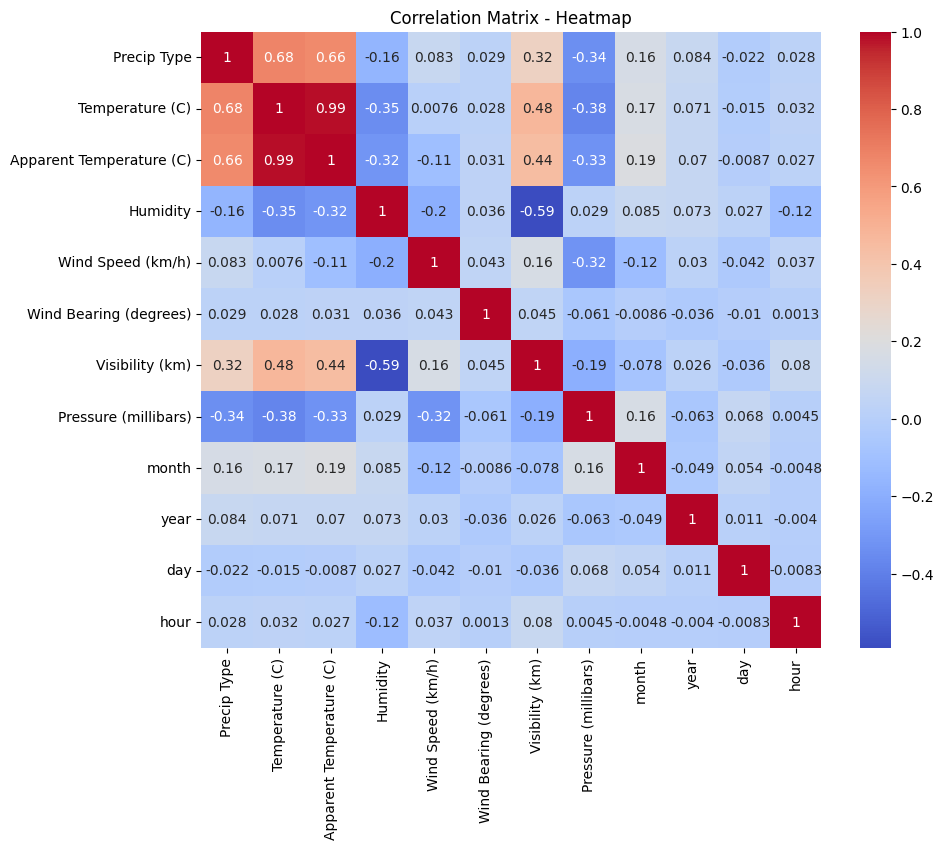

In [55]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
X=df.drop('Summary', axis=1)
# Assuming you have a pandas DataFrame named 'df' with the variables of interest

# Calculate the correlation matrix
corr_matrix = X.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix - Heatmap')
plt.show()

# p values of features

In [56]:
from sklearn.feature_selection import f_classif

X=df.drop('Summary', axis=1)
X
y=df['Summary']
y
# Assuming you have your feature matrix 'X' and target variable 'y'

# Calculate the p-values using f_classif
f_scores, p_values = f_classif(X, y)

# Create a DataFrame to store the results
results = pd.DataFrame({'Feature': X.columns, 'P-value': p_values})

# Sort the DataFrame by p-value in ascending order
results = results.sort_values('P-value')

# Print the results
print(results)
X

                     Feature       P-value
0                Precip Type  0.000000e+00
1            Temperature (C)  0.000000e+00
2   Apparent Temperature (C)  0.000000e+00
3                   Humidity  0.000000e+00
4          Wind Speed (km/h)  0.000000e+00
6            Visibility (km)  0.000000e+00
7       Pressure (millibars)  0.000000e+00
9                       year  3.309884e-86
8                      month  2.223212e-63
11                      hour  4.338192e-62
5     Wind Bearing (degrees)  4.118854e-20
10                       day  2.387254e-03


,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),month,year,day,hour
46,1,0.984618,1.021665,-2.428062,1.792951,-0.186596,1.496497,-1.155955,-0.612589,-1.53791,-0.65099,1.155869
47,1,0.963248,1.003056,-2.340650,1.199934,-0.105040,1.325510,-1.151433,-0.612589,-1.53791,-0.65099,1.283997
48,1,0.901273,0.949091,-2.253237,1.300583,-0.177534,1.496497,-1.211347,-0.612589,-1.53791,-0.65099,1.412126
49,1,0.838587,0.894506,-1.991000,0.838139,-0.177534,1.496497,-1.222652,-0.612589,-1.53791,-0.65099,1.540254
50,1,0.242350,0.021760,0.106899,2.135704,-1.337431,-0.298863,-1.466829,-0.612589,-1.53791,-0.53676,-1.406698
...,...,...,...,...,...,...,...,...,...,...,...,...
96432,1,1.134924,1.152546,0.106899,-1.033400,-1.255876,1.420503,-0.401946,0.629177,1.63995,-0.76522,-1.278570
96433,1,1.060127,1.087415,0.631373,-1.047002,1.462633,1.496497,-0.418903,0.629177,1.63995,-0.76522,-1.150441
96434,1,1.060839,1.088036,0.369136,-1.131330,1.625744,1.325510,-0.398555,0.629177,1.63995,-0.76522,-1.022313
96435,1,0.914096,0.960256,0.631373,-0.785857,-1.627405,1.496497,-0.386120,0.629177,1.63995,-0.76522,-0.894184


# correlation

In [57]:
X=df.drop('Summary', axis=1)
y=df['Summary']
# Assuming your dataset is stored in a DataFrame called 'df'
correlation_matrix = X.corr()
# Print the correlation matrix
print(correlation_matrix)

                          Precip Type  Temperature (C)   
Precip Type                  1.000000         0.677018  \
Temperature (C)              0.677018         1.000000   
Apparent Temperature (C)     0.659621         0.986894   
Humidity                    -0.164109        -0.347633   
Wind Speed (km/h)            0.082619         0.007561   
Wind Bearing (degrees)       0.029188         0.027986   
Visibility (km)              0.320519         0.475497   
Pressure (millibars)        -0.338333        -0.376838   
month                        0.160560         0.170610   
year                         0.084322         0.070954   
day                         -0.022122        -0.015004   
hour                         0.028018         0.032407   

                          Apparent Temperature (C)  Humidity   
Precip Type                               0.659621 -0.164109  \
Temperature (C)                           0.986894 -0.347633   
Apparent Temperature (C)                  1.000000 -0

# Removing highly correlated feature

In [58]:
df=df.drop('Apparent Temperature (C)', axis=1)
X=df.drop('Summary', axis=1)
correlation_matrix = X.corr()
# Print the correlation matrix
print(correlation_matrix)

                        Precip Type  Temperature (C)  Humidity   
Precip Type                1.000000         0.677018 -0.164109  \
Temperature (C)            0.677018         1.000000 -0.347633   
Humidity                  -0.164109        -0.347633  1.000000   
Wind Speed (km/h)          0.082619         0.007561 -0.197951   
Wind Bearing (degrees)     0.029188         0.027986  0.036057   
Visibility (km)            0.320519         0.475497 -0.591558   
Pressure (millibars)      -0.338333        -0.376838  0.029096   
month                      0.160560         0.170610  0.085080   
year                       0.084322         0.070954  0.073423   
day                       -0.022122        -0.015004  0.026857   
hour                       0.028018         0.032407 -0.120648   

                        Wind Speed (km/h)  Wind Bearing (degrees)   
Precip Type                      0.082619                0.029188  \
Temperature (C)                  0.007561                0.027986   


# Multicollinearity

In [59]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


# Select the numeric independent variables (features) for VIF calculation
numeric_cols = ['Precip Type', 'Humidity', 'Wind Speed (km/h)','Wind Bearing (degrees)','Visibility (km)','Pressure (millibars)']
X = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Drop rows with missing values
X = X.dropna()


# Calculate VIF for each independent variable
vif = pd.DataFrame()
vif['Variable'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Print the VIF results
print(vif)

                 Variable       VIF
0             Precip Type  1.041312
1                Humidity  1.611751
2       Wind Speed (km/h)  1.164469
3  Wind Bearing (degrees)  1.011478
4         Visibility (km)  1.640134
5    Pressure (millibars)  1.192255


In [61]:
df.to_csv('myData.csv')